## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1. Data from our lives	
2. Data manipulation/Exploratory Data Analysis
3. Multipe regression Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. **Add as many cells as you need**, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work. 

Good luck!


## 1. Data from our Lives

### Describe a situation or problem from your job, everyday life, current events, etc., for which a regression model would be appropriate. List some (up to 5) predictors that you might use.

**your answer should go here**



A Real Life situation where a regression model would be appropriate is in predicting the** LOAN RISK PREDICTION**. Through this system we can predict whether that particular applicant is safe or not to get a LOAN. while deciding weater to grant or not grant loan various features play a role these features are namely Credit History, Cash Flow (or Capacity), Collateral, Capitalization and Conditions.factors, making regression analysis a valuable tool for estimating the loan risk .The above mentioned features care used as predictors to predict wheter to grant or not grant a Loan :

1.**Credit History**: This is like a report card for borrowers. If someone has paid back loans on time before, banks are more likely to trust them. But if they haven’t, banks might worry if they'll pay back this time.

2.**Cash Flow** (or Capacity): Banks want to make sure borrowers have enough money to pay back loans. They look at how much money someone makes, how much they spend, and if there’s enough left over to pay back the loan without causing money problems.

3.**Collateral**: Think of this as a safety net. Borrowers offer something valuable, like a house, as a guarantee. If they can’t pay back the loan, the bank can sell this valuable thing to get its money back.

4.**Capitalization**: The financial strength and capital reserves of a borrower are considered. Higher capitalization implies a greater ability to absorb financial setbacks and repay loans.

5.**Conditions**: Economic and market conditions, both locally and globally, are factors that banks assess. Changes in conditions can affect a borrower's ability to repay, and banks consider these external factors when evaluating loan risk.

By collecting data on these predictors and applying regression analysis, we can build a model to estimate the loan risk , which can be useful for banks to decide wheter to grant a loan or not.


## The data

**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
  1 integer
   -- 10 nominal
-- 15 continuous
7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsc -- 15 continuous
   -- he, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
#Read in data
df =pd.read_csv("C:\\Users\\ARHAAM DANIYAL SYED\\Desktop\\auto_imports1.csv")

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data 

## 2.1 Munging

Check what types of variables do you have in your data? Do you see anything that doesn't make sense? *Hint: horse power is  an object ?!*

In [4]:
##your code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

here we use the function .info() which gives the information about the data and variables of the data and various data types 
here we get to know that **bore, stroke, horse_power and peak_rpm**  data type is defined as **object** but as we look at the data it is **float** data type.

**object** :When a column has the data type "object" in Python, it means that the values in that column can be almost anything. They don't have to be numbers or categories; they can be any kind of thing in Python, like words, dates, or even custom things you create. 
but here we know that  **bore, stroke, horse_power and peak_rpm** are to be **float** data type 

### Replace '?' with None

### Change the variables: bore, stroke, horse_power, peak_rpm to float64

In [5]:
## To Replace ? with NONE we use .replace 
df.replace('?', None, inplace=True)

##changing the dtypes 
columns= ['bore', 'stroke', 'horse_power', 'peak_rpm']
##using astype() function to change the dtype
df[columns] = df[columns].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

### Drop body,engine_type,cylinders columns and name the new dataframe df2

In [7]:
##list of columns to drop
columns_dropped = ['body', 'engine_type', 'cylinders']
#dropping the columns and naming the new dataframe df2
df2 = df.drop(columns=columns_dropped, axis=1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   wheel_base   201 non-null    float64
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   heights      201 non-null    float64
 5   curb_weight  201 non-null    int64  
 6   engine_size  201 non-null    int64  
 7   bore         197 non-null    float64
 8   stroke       197 non-null    float64
 9   comprassion  201 non-null    float64
 10  horse_power  199 non-null    float64
 11  peak_rpm     199 non-null    float64
 12  city_mpg     201 non-null    int64  
 13  highway_mpg  201 non-null    int64  
 14  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 23.7+ KB


In [8]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Drop all nan values

In [9]:
## dropping all nan values
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 24.4+ KB


In [10]:
df2.isnull().sum()


fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

### Get dummy variables for fuel_type within df2 drop first level

In [11]:
## Your code goes here
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)

In [12]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


## 2.2 EDA on df2

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

Suggested Steps in EDA:

    Provide descriptions of your sample and features
    Check for missing data
    Identify the shape of your data
    Identify significant correlations
    Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset (**df2**).

Don't forget to add "markdown" cells to include your findings or to explain what you are doing


**Exploratory Data Analysis** 
describing the data shape of the data columns of the data 

In [13]:
## getting the top 5 rows of data
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


**DESCREPTION OF OUR DATA AND ITS FEATURES**

In [14]:
#shape of the data 
df2.shape

(195, 15)

here we get to know the number of rows and columns of the data which are 195 rows and 15 columns 

In [15]:
#columns of the data 
df2.columns

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'fuel_type_gas'],
      dtype='object')

here we get the columns of the data or the features of the data 

In [16]:
#datatypes of the data
df2.dtypes

wheel_base       float64
length           float64
width            float64
heights          float64
curb_weight        int64
engine_size        int64
bore             float64
stroke           float64
comprassion      float64
horse_power      float64
peak_rpm         float64
city_mpg           int64
highway_mpg        int64
price              int64
fuel_type_gas      uint8
dtype: object

In [17]:
#describing the data 
df2.describe()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,0.897436
std,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.304170
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,1.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,1.000000
75%,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,1.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000


Here by using the .describe() function we describe the data, we get the count , mean ,standard deviation, minimum, we get percentage quartile of 25%,50%,75%, and we get maximum of data in respect to each column.

In [18]:
#checking the missing values
df2.isnull().sum()

wheel_base       0
length           0
width            0
heights          0
curb_weight      0
engine_size      0
bore             0
stroke           0
comprassion      0
horse_power      0
peak_rpm         0
city_mpg         0
highway_mpg      0
price            0
fuel_type_gas    0
dtype: int64

here we use .isnull() function to check the missing values and the sum funtion to sum the number of missing values in each column .
as we see there is no missing value in any of the 15 columns.

**Balance of Data**

In [19]:
#value count of rows w.r.t fuel type
df2.value_counts("fuel_type_gas")

fuel_type_gas
1    175
0     20
dtype: int64

we got to do the data balancing because we need to know how many count of automobiles are there of gas and diesel type in data we get to know that in the data there are 175 automobiles of fuel type **'1'** which means **gas** and 20 automobiles of **'0'** fuel type i.e ****diesel**.

**Corelation Analysis**

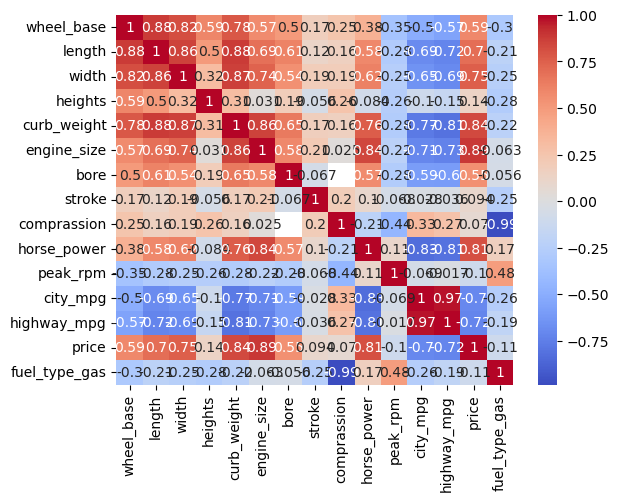

In [20]:
correlation_matrix = df2.corr()
alpha = 0.005
significant_correlations = correlation_matrix[(correlation_matrix >= alpha) | (correlation_matrix <= -alpha)]
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm')
plt.show()

**OUTLIERS CHECK**

<AxesSubplot:>

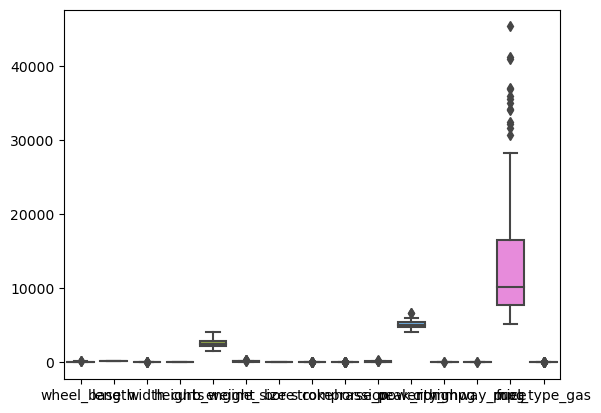

In [21]:
sns.boxplot(data=df2)

In [22]:
%store df2

Stored 'df2' (DataFrame)


here we plot a box plot to check the outliers

## 3. Multiple Regression Analysis ! Use the df2 dataset!

**1. Create a model that uses all the variables** and call it model1. The dependent variable is price, the independent variables are all the rest. Print out a summary of the model (coefficents, stanrard errors, confidence intervals and other metrics shown in class and answer the quesions based on your output.

In [23]:
##Your code goes here
X = df2.drop(columns=["price"])  # All columns except "price"
y = df2["price"]
# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create the linear regression model
model1 = sm.OLS(y, X).fit()

# Print the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     78.89
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           5.84e-69
Time:                        14:18:59   Log-Likelihood:                -1838.5
No. Observations:                 195   AIC:                             3707.
Df Residuals:                     180   BIC:                             3756.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.45e+04   1.84e+04     -2.419

In [36]:
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)


1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it?
5. What is the F-statistics used for? How do you interpret it for this model?

**Answer 1:** The intercept in a linear regression model represents the estimated value of the dependent variable when all the independent variables are set to zero. Here the intercept, which is approximately -44,500, represents the estimated value of the dependent variable ("price") when all independent variables are zero. However, in this context, it may not have a meaningful interpretation since many of the independent variables, such as "wheel_base," "length," "width," etc., cannot be zero in a practical sense.

**Answer 2:** Statistically significant variables are those independent variables in a regression model that have a significant impact on the dependent variable. Here we measure the statistically significant variables based on the alpha level here we take alpha level as 0.005 so by lookink at the "P>|t|" column in the summary. Variables with p-values less than your chosen significance level (alpha) are considered statistically significant. In this case:
"width," "heights," "engine_size," "stroke," "peak_rpm," and "fuel_type_gas" have p-values less than 0.05, indicating statistical significance.

**Answer 3:** so here (R-squared: 0.860) i.e variance is 0.860x100=86%.

**Answer 4:** The coefficient of determination, often denoted as R-squared.
R-squared can take values between 0 and 1, and i is interpreted as:

R-squared = 0:  The model does not fit the data at all.
R-squared = 1:  The model fits the data perfectly.

**Answer 5:** The F-statistic (F-statistic: 78.89) is used to test whether the model as a whole is statistically significant. Here the F statistic is 78.89, and the associated p-value (Prob (F-statistic)) is very close to zero (5.84e-69).This means that at least one independent variable has a significant effect on the dependent variable, "price."

**2. Drop all the variables that are not statistically significant** at least at 90% confidence level. Run another regression model with price as the dependent variable and the rest of the variables as the independent variabls. Call it model2. Print a summary of the results and answer the questions bellow. 

In [25]:
##creating a model2
significant_vars = model1.pvalues[model1.pvalues <= 0.1].index

# Create model2 with only the significant variables
X_model2 = X[significant_vars]  # X is the matrix of independent variables with the constant
model2 = sm.OLS(y, X_model2).fit()

# Print a summary of the results for model2
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.29e-73
Time:                        14:18:59   Log-Likelihood:                -1842.2
No. Observations:                 195   AIC:                             3702.
Df Residuals:                     186   BIC:                             3732.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.156e+04   1.49e+04     -4.138

1. How do you interpret the intercept?
2. How many variables are statistically significant?
3. What is the variance of the model?
4. What is the coefficeint of determination and how do you interpret it? What is the Adjusted R-squared and compare it to the model1's value. 
5. What is the F-statistics used for? How do you interpret it for this model?

**Answer 1:** The intercept in a linear regression model represents the estimated value of the dependent variable when all the independent variables are set to zero. Here the intercept, which is approximately -61,560 represents the estimated value of the dependent variable ("price") when all independent variables are zero. However, in this context, it may not have a meaningful interpretation since many of the independent variables, such as "wheel_base," "length," "width," etc., cannot be zero in a practical sense.

**Answer 2:** Statistically significant variables are those independent variables in a regression model that have a significant impact on the dependent variable. Here we measure the statistically significant variables based on the alpha level here we take alpha level as 0.005 so by lookink at the "P>|t|" column in the summary. Variables with p-values less than your chosen significance level (alpha) are considered statistically significant. In this case also:
"width," "heights," "engine_size," "stroke," "peak_rpm," and "fuel_type_gas" have p-values less than 0.05, indicating statistical significance.

**Answer 3:** so here (R-squared: 0.854) i.e variance is 
0.854x100=85.4%.

**Answer 4:** The coefficient of determination, often denoted as R-squared.
R-squared can take values between 0 and 1, and i is interpreted as:

R-squared = 0:  The model does not fit the data at all.
R-squared = 1:  The model fits the data perfectly.
Adjusted R-squared (Adj. R-squared: 0.848) is a variation of R-squared that adjusts for the number of independent variables in the model. It provides a more conservative estimate of the goodness of fit. In this case, the adjusted R-squared is slightly lower than the regular R-squared, which is expected when there are multiple independent variables. An adjusted R-squared closer to 1 indicates a better fit.Comparing this model's adjusted R-squared to the previous model (model1) shows that the adjusted R-squared value for this model is slightly lower (0.848 vs. 0.849), which suggests that this model might be a slightly worse fit, possibly due to the inclusion of fewer independent variables.

**Answer 5:** The F-statistic (F-statistic: 136.8) is used to test whether the model as a whole is statistically significant. Here the F statistic is 136.8, and the associated p-value (Prob (F-statistic) 1.29e-73) is very close to zero ().This means that at least one independent variable has a significant effect on the dependent variable, "price."



**3. Compare the two models with ANOVA**. What are your null and alternative hypothesis? What is your conclusion?

In [26]:
##getting the ANOVA results
anova_results = sm.stats.anova_lm(model1, model2)
print(anova_results)











   df_resid           ssr  df_diff       ss_diff        F  Pr(>F)
0     180.0  1.764456e+09      0.0           NaN      NaN     NaN
1     186.0  1.832575e+09     -6.0 -6.811918e+07  1.15231     NaN


**ANSWER:** Here:

**df_resid**: Degrees of freedom for the residuals.

**ssr**: Sum of squared residuals.

**df_diff**: Difference in degrees of freedom between the two models.

**ss_diff**: Difference in the sum of squared residuals between the two models.

**F**: F-statistic, which measures the ratio of explained variance to unexplained variance.

**Pr(>F)**: The p-value associated with the F-statistic.

Now , 
The null hypothesis (H0) typically states that there is no significant difference between the two models, while the alternative hypothesis (H1) suggests that there is a significant difference between the models in terms of explaining the variance in the dependent variable.

**Null Hypothesis (H0):** The two models are equal in terms of explaining the variance in the dependent variable.

**Alternative Hypothesis (H1):** The two models are not equal; at least one of them is significantly better at explaining the variance in the dependent variable.
 Now, by looking at the he p-value (Pr(>F)) which is not provided (NaN).i.e there is no significant diffrence between the two models, from this we can conclude that it Fails to Reject the Null Hypothesis.

**4.Checking the assumptions:**

-What are the assumptions?

-Do they hold?

**LINERARITY ASSUMPTION**

c:\Users\ARHAAM DANIYAL SYED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


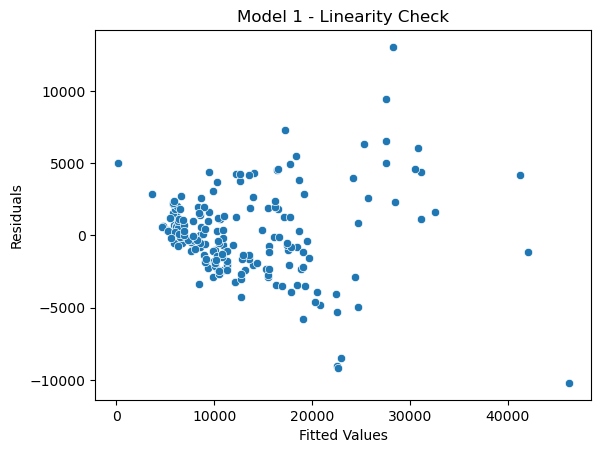

c:\Users\ARHAAM DANIYAL SYED\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


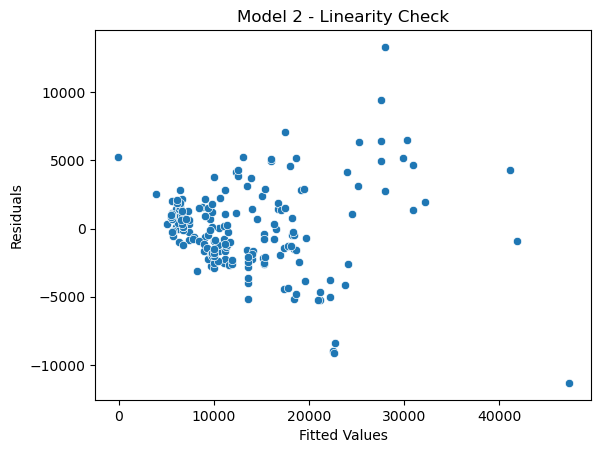

In [27]:
# Check Linearity Assumption
plt.figure()
plt.subplot()
sns.scatterplot(model1.fittedvalues, model1.resid)
plt.title("Model 1 - Linearity Check")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


plt.subplot()
sns.scatterplot(model2.fittedvalues, model2.resid)
plt.title("Model 2 - Linearity Check")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()








**ANSWER** 
  the Linearity Assumption appears to hold as there are no apparent trends or non-linear patterns in the scatterplots.

**INDEPENDENCE ASSUMPTION**

In [28]:
 ##Checking Independence Assumption (Durbin-Watson)
dw_model1 = sm.stats.stattools.durbin_watson(model1.resid)
dw_model2 = sm.stats.stattools.durbin_watson(model2.resid)
print(f"Durbin-Watson Statistic Model 1: {dw_model1}")
print(f"Durbin-Watson Statistic Model 2: {dw_model2}")

Durbin-Watson Statistic Model 1: 0.9784765574137844
Durbin-Watson Statistic Model 2: 0.9437520872376977


**ANSWER** 
IN the Durbin-Watson statistic if it is  close to 2, it indicates no significant autocorrelation (independence holds).

**For Model 1**, the Durbin-Watson statistic is approximately 0.9785, which is close to 2. This suggests that there is no significant positive or negative autocorrelation in the residuals of Model 1. Therefore, the Independence Assumption appears to hold for Model 1.

**For Model 2**, the Durbin-Watson statistic is approximately 0.9437, which is also close to 2. This suggests that there is no significant positive or negative autocorrelation in the residuals of Model 2. Therefore, the Independence Assumption appears to hold for Model 2 as well.

**CONSTANT VARIANCE ASSUPTION**

In [29]:
# Checking for  Constant Variance Assumption
from statsmodels.stats.diagnostic import het_breuschpagan

# For Model 1
bp_test1 = het_breuschpagan(model1.resid, model1.model.exog)
print("Breusch-Pagan Test for Model 1:")
print(f"LM Statistic: {bp_test1[0]}")
print(f"P-value: {bp_test1[1]}")

# For Model 2
bp_test2 = het_breuschpagan(model2.resid, model2.model.exog)
print("\nBreusch-Pagan Test for Model 2:")
print(f"LM Statistic: {bp_test2[0]}")
print(f"P-value: {bp_test2[1]}")

Breusch-Pagan Test for Model 1:
LM Statistic: 77.88393057396733
P-value: 6.971426693132045e-11

Breusch-Pagan Test for Model 2:
LM Statistic: 76.52993116063654
P-value: 2.4347792106587913e-13


**ANSWER**

The Breusch-Pagan test is used to check for the assumption of constant variance (homoscedasticity) in a linear regression model. Specifically, it assesses whether the variance of the residuals is constant across different levels of the independent variables. A significant p-value in the Breusch-Pagan test indicates the presence of heteroscedasticity, which violates the constant variance assumption.
Both Model 1 and Model 2 have very low p-values (much less than the typical significance level of 0.05), indicating that the null hypothesis of constant variance is rejected. This suggests that there is evidence of heteroscedasticity in both models, meaning that the variance of the residuals is not constant across different levels of the independent variables.


**NORMALITY ASSUMPTION CHECK**


In [30]:
# Importing required library
from statsmodels.stats.stattools import jarque_bera
# Get the residuals from the model1
residuals = model1.resid

# Perform the Jarque-Bera test
jb_statistic, jb_pvalue, skewness, kurtosis = jarque_bera(residuals)

# Print the test results
print(f"Jarque-Bera Statistic: {jb_statistic}")
print(f"P-value: {jb_pvalue}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Get the residuals from the model2
residuals = model2.resid

# Perform the Jarque-Bera test
jb_statistic, jb_pvalue, skewness, kurtosis = jarque_bera(residuals)

# Print the test results
print(f"Jarque-Bera Statistic: {jb_statistic}")
print(f"P-value: {jb_pvalue}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Jarque-Bera Statistic: 55.210777002807724
P-value: 1.0259639549714608e-12
Skewness: 0.24046525207000505
Kurtosis: 5.562006714350951
Jarque-Bera Statistic: 61.1158800947105
P-value: 5.356181179043409e-14
Skewness: 0.17693582710287825
Kurtosis: 5.719692873385673


**ANSWER**
The Jarque-Bera test statistic is high (55.21), and the associated p-value is  low (approximately 1.03e-12), which is much smaller than the commonly chosen significance level of 0.05.
i.e that the normality assumption for the residuals in the  regression model is violated and it does not hold normality assumption for model 1. 
Simillarly for model 2 we get 
The Jarque-Bera test statistic is high (61.11), and the associated p-value is  low (approximately 1.025e-12), which is much smaller than the commonly chosen significance level of 0.05.
i.e that the normality assumption for the residuals in the  regression model is violated and it does not hold normality assumption for model 2. 



**5. Is there Multicollinearity in your data?**

In [31]:
# Calculate the condition number for Model 1
X1 = model1.model.exog  # Get the design matrix for Model 1
condition_number_model1 = np.linalg.cond(X1)

# Calculate the condition number for Model 2
X2 = model2.model.exog  # Get the design matrix for Model 2
condition_number_model2 = np.linalg.cond(X2)

# Print the condition numbers
print("Condition Number for Model 1:", condition_number_model1)
print("Condition Number for Model 2:", condition_number_model2)
 







Condition Number for Model 1: 476678.68868056
Condition Number for Model 2: 339347.8089704866


**ANSWER**

**Multicollinearity**, in simple terms, is a situation in a statistical analysis where two or more independent variables in a model are strongly related to each other.
Here, we use the conditional number of both the modles to measure the multicollinearity.
 condition number close to 1 indicates that the independent variables does not hold  multicollinearity.
A condition number much larger than 1,  suggests that the independent variables are highly correlate and hold  multicollinearity.

In **Model 1**, the condition number is approximately 476679 and in **Model 2**, it's approximately 339347. Both of these values are significantly larger than 1, which suggests that the independent variables in both models are highly correlated with each other. therefore high multicollinearty exsists in our models...
 